# **INTRODUCTION TO PENNYLANE**

Codebook (tutorials, interactive elementary textbook, more advanced applications): [link](https://codebook.xanadu.ai/)

PennyLane is an **open-source cross-platform Python library** that supports a wide array of tasks in quantum computing, quantum machine learning, and quantum chemistry.

Its capabilities for the differentiable programming of quantum computers have been designed to seamlessly integrate with classical machine learning libraries, quantum simulators and hardware, giving users the power to train quantum circuits.

<p align="center">
  <img src="penny.png" style="height: 500px;width: auto" />
</p>

Unlike other quantum programming libraries, Pennylane is based on the following features

*   **Follow the gradient.** Built-in automatic differentiation of quantum circuits.

*   **Best of both worlds.** Support for hybrid quantum and classical models;
connect quantum hardware with PyTorch, TensorFlow, and NumPy.

*   **Batteries included.** Provides optimization and machine learning tools.

*   **Device-independent.** The same quantum circuit model can be run on different backends. Install plugins to access even more devices, including Strawberry Fields, Amazon Braket, IBM Q, Google Cirq, Rigetti Forest, Microsoft QDK, and ProjectQ.


> Pennylane provides tools to integrate with Qiskit 1.0 (quantum SDK by IBMQ)

A growing number of authors started providing a Demo of their recent paper on Pennylane.

This is a new practical way of sharing scientific results.
Check some examples here: [link](https://pennylane.ai/search/?contentType=DEMO&sort=publication_date)

In [1]:
#!pip install pennylane

<div class="alert alert-block alert-warning">
&#9888;&#65039; When constructing a hybrid quantum/classical computational model with PennyLane, it is important to always import NumPy from PennyLane, not the standard NumPy!
</div>

In [12]:
import pennylane as qml
from pennylane import numpy as np

%matplotlib inline

## Elements of quantum computation

The power of quantum computers comes from the different way in which they represent and manipulate information.
Two main quantum effects that can be useful for computation are
- quantum superposition
- entanglement

Quantum computers use special bits, called quantum bits, or **qubits**. As with bits, qubits also correspond to something physical, but our focus here will be on the theory from a software and algorithmic perspective.

Before we can delve into quantum computation, we need a **framework** for describing qubits and the things we can do to them. The key ingredients we need are:

*   a mathematical representation of a qubit's state
*   a way of manipulating the state to perform computation (quantum gates)
*   a means of measuring a qubit to determine what state it is in

All these three elements -- quantum states, gates and measurements -- are easily implemented in Pennylane.

---


### Qubit representation
In linear algebra terms, the qubit in the state $\vert0\rangle$ and $\vert1\rangle$ are represented by the following two-dimensional vectors.

$$
\vert0\rangle :=
 \begin{pmatrix}
  1 \\
  0
 \end{pmatrix}
$$
$$\vert1\rangle :=
 \begin{pmatrix}
  0 \\
  1
 \end{pmatrix}
$$

A single-qubit quantum state $\vert\psi\rangle$ can then be written as follows

$$
\vert\psi\rangle = \alpha\vert0\rangle + \beta\vert1\rangle :=
 \begin{pmatrix}
  \alpha \\
  \beta
 \end{pmatrix}\quad\text{where}\quad |\alpha|^2+|\beta|^2=1
$$

We will talk about many-qubit states in the next notebook!

---


### Quantum gates

Performing quantum operations involves multiplication by matrices that send valid, normalized quantum states to other normalized quantum states.

Recall that qubit states are represented by 2-dimensional vectors that live in a mathematical space called the **Hilbert space**. We know already that single qubit operations must take valid qubit states to other valid qubit states, and this is done using matrix-vector multiplication by a $2\times 2$ matrix. Let us see an example (Hadamard gate):

$$
U = \frac{1}{\sqrt{2}}
 \begin{pmatrix}
  1 & 1 \\
  1 & -1
 \end{pmatrix}
$$

Given an initial qubit state $\vert\psi\rangle$, a single-qubit operation $U$ sends

$$
\vert\psi\rangle → \vert\psi'\rangle = U\vert\psi\rangle
$$

In vector representation

$$
\vert\psi'\rangle :=
 \begin{pmatrix}
  \alpha' \\
  \beta'
 \end{pmatrix} = \frac{1}{\sqrt{2}}
 \begin{pmatrix}
  1 & 1 \\
  1 & -1
 \end{pmatrix}\begin{pmatrix}
  \alpha \\
  \beta
 \end{pmatrix}= \frac{1}{\sqrt{2}}\begin{pmatrix}
  \alpha + \beta \\
  \alpha - \beta
 \end{pmatrix}
$$

However, recall that qubit state vectors have some special properties - in particular, they are normalized, i.e., have length 1. Thus, any matrix that operates on qubits is going to require a structure that preserves this property. Matrices of this type are called **unitary** matrices. More formally, an $n\times n$  complex-valued matrix $U$ is unitary if

$$
UU^{†} = U^{†}U = I_n
$$

$$
U = \begin{pmatrix}
  a & b \\
  c & d
\end{pmatrix}, \hspace{5mm} U^{†} = \begin{pmatrix}
  a^* & c^* \\
  b^* & d^*
\end{pmatrix}
$$

---


### Measurements

Let us now move to measurements. If we measure a quantum state, different outcome probabilities are related to the amplitudes of a qubit's state vector.
In practice, a measurement in quantum computing is always performed with respect to a *basis*.

Such **projective measurements** determine the probability of each basis state outcome by computing the inner product between the basis state $\vert\varphi\rangle$ and the current system state $\vert\psi\rangle$:

$$
Pr_{φ}(\psi) = |\langle\varphi|\psi\rangle|^2
$$

In quantum computing one performs measurements on a quantum state, which is first prepared by applying gates to a blank register (all qubits are initialized in state $|0\rangle$).
After the state is prepared, measurements are often performed on the *computational basis*.

For a single qubit, the computational basis is simply $\{|0\rangle,|1\rangle\}$.
The computational basis states are, by definition, the eigenstates of the Pauli operator $Z$
$$
Z := \begin{pmatrix}
  1 & 0 \\
  0 & -1
\end{pmatrix}
$$
For more qubits (e.g. for 3 qubits), the computational basis states are the simultaneous eigenstates of $Z_1$, $Z_2$, $Z_3$ etc.
An example is: $$|0\rangle \otimes |1\rangle \otimes |0\rangle \equiv |010\rangle$$


**Quantum computers are often used as sampler with discrete probability outcomes, to estimate expectation value of an observable**

An observable can be described in the context of quantum computing simply as a Hermitian matrix $O$ such that:

$$
O = O^{†}
$$


The expactazion value of $Z$ respect to the state $\vert\psi\rangle$ is

$$
\langle\psi\vert Z\vert\psi\rangle := \begin{pmatrix}
  \alpha^* & \beta^*
\end{pmatrix}\begin{pmatrix}
  1 & 0 \\
  0 & -1
\end{pmatrix}\begin{pmatrix}
  \alpha \\
  \beta
\end{pmatrix}=|\alpha|^2 - |\beta|^2
$$

In a real quantum experiment, one should prepare the state $|\psi\rangle$ a number $M$ times. After the state is prepared, one performs a measurement, obtaining $M_0$ times the state $|0\rangle$ (eigenvalue 1) and $M_1 = M - M_0$ times the state $|1\rangle$ (eigenvalue -1).
The expectation value above is estimated experimentally as

$$
\langle\psi\vert Z\vert\psi\rangle \approx \frac{M_0}{M} (1) + \frac{M_1}{M} (-1) = \frac{M_0}{M}-\frac{M_1}{M}
$$

## Elements of quantum computation with Pennylane

The first step is to define a **device**, that is an environment in which to perform quantum operations. They can be simulators on classical hardware or real quantum hardware.

<div class="alert alert-block alert-warning">
&#9888;&#65039; The <code>default.qubit</code> device is PennyLane’s standard qubit-based device:
</div>

[Documentation](https://docs.pennylane.ai/en/stable/code/api/pennylane.devices.default_qubit.DefaultQubit.html)


In [13]:
dev = qml.device("default.qubit", wires=1)
# wires = number of qubits

The fundamental element introduced in pennylane is the quantum node (`qnode`) which allows you to interface the quantum circuit with a device (either a real quantum device or a classical simulator, as in this case).

It also allows integration with libraries for tensor calculation used in machine learning.

Recall that
> A quantum circuit is composed by the series of operations and measurements to be applied to a set of qubits. It represents the fundamental building block of quantum algorithms.

A `qnode`  is applied as a decorator to a function that defines the quantum circuit: the function becomes itself an object of the class `QNode`.

So let's see the first example of a quantum circuit on pennylane

In [27]:
'''
Interfaces: different automatic differentiation (AD) frameworks
Examples: autograd (pennylane), tensorflow, pytorch, jax
'''

@qml.qnode(dev, interface="autograd")
def circuit_1():
    qml.Hadamard(wires=0) # on the first qubit (only one in the circuit)
    return qml.expval(qml.PauliZ(0)) # computational basis measurements to compute expectation value of Z

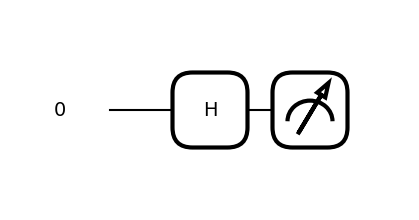

In [28]:
# draw it

fig, ax = qml.draw_mpl(circuit_1)() # the second empty parethesis is for circuit parameters: here there are none

In [29]:
# result of the circuit

print(circuit_1())

0.0


The steps of the circuit are:

1.   Apply Hadamard gate

$$
\vert\psi\rangle = H\vert0\rangle = \frac{1}{\sqrt{2}}
 \begin{pmatrix}
  1 & 1 \\
  1 & -1
 \end{pmatrix}\begin{pmatrix}
  1\\
  0
 \end{pmatrix}= \frac{1}{\sqrt{2}}\begin{pmatrix}
  1 \\
  1
 \end{pmatrix} = | +\rangle
$$

where we defined the eigenstates of Pauli-X as $$ X |\pm\rangle = \pm |\pm\rangle \qquad \text{with} \qquad |\pm\rangle \frac{1}{\sqrt{2}}\begin{pmatrix}
  1 \\
  \pm1
 \end{pmatrix} $$.

Note that $H\vert1\rangle = |-\rangle$, so the Hadamdard gate connects the two basis of eigenstates of Z and X.

2.  Evaluate the expectaion value respect to $Z$

$$
\langle\psi\vert Z\vert\psi\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix}
  1 & 1
 \end{pmatrix}\begin{pmatrix}
  1 & 0 \\
  0 & -1
\end{pmatrix}\frac{1}{\sqrt{2}}\begin{pmatrix}
  1 \\
  1
 \end{pmatrix}=\frac{1}{2} - \frac{1}{2} =0
 $$

<div class="alert alert-block alert-danger">
&#9888;&#65039; <b>!ATTENTION!</b>  We are using a simulator that allows us to access intermediate states and compute expectation values analytically. On a quantum computer this is not possible. Information on the quantum state can be extracted only by collecting **measurement results on the final state**. In this way, expectation values can be estimated as a sample mean.
</div>

The `Snapshot` operation saves the internal simulator state at specific execution steps of a quantum function. As such, it is a pseudo operation with no effect on the quantum state.

In [34]:
@qml.qnode(dev, interface="autograd")
def circuit_2():
  qml.Snapshot()
  qml.Hadamard(wires=0)
  qml.Snapshot()
  return qml.expval(qml.PauliZ(0))

In [18]:
qml.snapshots(circuit_2)()

{0: tensor([1.+0.j, 0.+0.j], requires_grad=True),
 1: tensor([0.70710678+0.j, 0.70710678+0.j], requires_grad=True),
 'execution_results': tensor(0., requires_grad=True)}

### Qubit rotations

A general transformation on a qubit can be obtained with the right combination of the following matrices that represent rotations on the Bloch sphere.

$$ R_\alpha(\theta) = e^{-i \frac{\theta}{2}\sigma_\alpha} = \mathrm{I}\cos{\frac{\theta}{2}} - i \sin{\frac{\theta}{2}} \sigma_\alpha \qquad \text{for} \ \ \alpha=x,y,z $$

<p align="center">
  <img src="rotations.png" style="height: 500px;width: auto" />
</p>

In [19]:
@qml.qnode(dev, interface="autograd")
def circuit_3(theta):
  qml.Snapshot()
  qml.RY(theta, wires=0)
  qml.Snapshot()
  return qml.expval(qml.PauliZ(0))

In [20]:
theta_1 = np.pi/2
theta_2 = np.pi

print(qml.snapshots(circuit_3)(theta_1)) # evaluate at theta_1: state |+>
print("\n\n")
print(qml.snapshots(circuit_3)(theta_2)) # evaluate at theta_2: state |1>

{0: tensor([1.+0.j, 0.+0.j], requires_grad=True), 1: tensor([0.70710678+0.j, 0.70710678+0.j], requires_grad=True), 'execution_results': tensor(2.22044605e-16, requires_grad=True)}



{0: tensor([1.+0.j, 0.+0.j], requires_grad=True), 1: tensor([6.123234e-17+0.j, 1.000000e+00+0.j], requires_grad=True), 'execution_results': tensor(-1., requires_grad=True)}


In [21]:
print(circuit_3(theta_1))
print("\n")
print(circuit_3(theta_2))

2.220446049250313e-16


-1.0


### Measurements on a general observable

What should be done to obtain the expectation value of an operator that is not $Z$? For example $X$

$$
X := \begin{pmatrix}
  0 & 1 \\
  1 & 0
\end{pmatrix}
$$

Until now all states (vectors) and quantum gates (matrices) have been defined in the computational basis, the basis of eigenstates of $Z$.
To carry out measurements on another observable $O$, we must diagonalize it:

$$
O = U O_D U^{†}\,,
$$

where $U$ is some unitary transformation and $O_D = diag(\lambda_1, \lambda_2)$ is a diagonal matrix with the eigenvalues of the observable $O$.

At the end of the circuit, one should apply $U^{†}$ and perform measurements on the computational basis as usual.
Indeed, suppose we perform a measurement on the state $U^{†} | \psi \rangle$, and obtain the computational basis state $|0\rangle$ or $| 1\rangle$.
This corresponds to a measurement on the state $| \psi \rangle$, yielding the first or second eigenvector of $O$.

For the simple example of $X$, $U= U^{†}= H$ i.e. the Hadamard gate: $X = HZH$. Notice that all Pauli matrices have spectrum $\{1,-1\}$, so the diagonal operator is always $O_D = Z$.

> Bonus exercise at home:
>
> Generalize this argument to the case of an observable $O$ on $n$ qubits ($N=2^n$).
>
>Use:
>
>$$
>O = U O_D U^{†}\,,
>$$
>and the expansion in the computational basis
>$$ O_D = \sum_{j=1}^N \lambda_j |j\rangle \langle j | $$
>and substitute into the expectation value $\langle \psi | O | \psi \rangle$.
>
>Note that diagonalizing $O$ is, in general, exponentially hard in the number of qubits $n$. It may require an exponential number of gates (impractical).



In [22]:
@qml.qnode(dev, interface="autograd")
def circuit_4(theta):
  qml.RY(theta, wires=0)
  qml.Hadamard(wires=0) # apply U^\dagger and measure on the Z basis
  return qml.expval(qml.PauliZ(0))

print(circuit_4(theta_1))
print(circuit_4(theta_2))

0.9999999999999998
0.0


>Pennylane automatically allows you to change the basis and then make measurements and calculate expectation values on an arbitrary observable

In [23]:
@qml.qnode(dev, interface="autograd")
def circuit_5(theta):
  qml.RY(theta, wires=0)
  return qml.expval(qml.PauliX(0)) # directly measure on the X basis

print(circuit_5(theta_1))
print(circuit_5(theta_2))

0.9999999999999998
0.0


In [24]:
ob1 = qml.PauliX(0)
ob2 = qml.Hermitian( np.array( [[0, 1], [1, 0]] ) , 0) # define a customized observable. Here it is just Pauli X

@qml.qnode(dev, interface="autograd")
def circuit_6(theta, ob):
  qml.RY(theta, wires=0)
  if ob==0:
    return qml.expval(ob1)
  if ob==1:
    return qml.expval(ob2)

theta = np.pi/2
ob_id = 0
print(circuit_6(theta, ob_id))
ob_id = 1
print(circuit_6(theta, ob_id))

0.9999999999999998
1.0



---
## Exercise 1

We have seen that by adding a Hadamard gate we obtain the expectation vaue of $X$.

How should we select $U$ so that $Y = UZU^{†}$?

Recall that:
$\hspace{70mm}$ $ Y := \begin{pmatrix}
  0 & -i \\
  i & 0
\end{pmatrix}$

Check the answer by building two qnodes with `wires=1`: both with a single qubit rotation $R_X(\theta)$, for any value of $\theta$. In the first one, directly measure the expectation value of `qml.PauliY(0)`. In the second one, measure it on the computational basis `qml.PauliZ(0)`, by adding the gate $U^{†}$ after the rotation, such that $Y = UZU^{†}$

<div class="alert-block alert-info">
&#128161; <b>Hint:</b> The unitary is U = S H, and to implement its adjoint you have to use the Hadamard gate and the following gate called adjoint Phase gate:
</div>

$$
S^{†} := \begin{pmatrix}
1 & 0 \\
0 & -i
\end{pmatrix}
$$

The pennylane command to implement it is the following

```python
  U = np.array([[1, 0], [0, -1j]])
  qml.QubitUnitary(U, wires=0)
```
</div>
  





In [42]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 0], [0, -1j]])
qml.QubitUnitary(U, wires=0)

theta = (1/3) * np.pi

@qml.qnode(dev, interface="autograd")
def circuit_ex1():
    ##############
    # Add rotation
    ##############
    qml.RX(theta, wires = 0),
    return qml.expval(qml.PauliY(0))

@qml.qnode(dev, interface="autograd")
def circuit_ex2():
    ##############
    # Add rotation
    ##############
    qml.RX(theta, wires = 0),
    qml.QubitUnitary(U, wires = 0),
    ##############
    # Basis trasformation
    ##############

    qml.Hadamard(0),
    return qml.expval(qml.PauliZ(0))

print(np.isclose(circuit_ex1(), circuit_ex2()))

True


## Exercise 2

Check the following commutation relations

$$
\left[ R_x(\theta_1), R_y(\theta_2)  \right]\neq 0
$$

<div class="alert-block alert-info">
	&#128161; <b>Hint:</b> You can see this by building two circuits where the order of the two gates is reversed. We then need to choose which expectation value to compute (Z, X or Y) to check for the difference.

&#9888;&#65039; Check the intermediate states between the transformations and their position on the Bloch sphere
</div>

In [49]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev, interface="autograd")
def circuit_ex3():
    qml.Snapshot(),
    ##############
    # Add rotation
    ##############
    qml.PauliZ(0),
    ##############
    # Return the expval of Z,X or Y
    ##############
    print(qml.Snapshot()),
    return qml.expval(qml.PauliY(0))


@qml.qnode(dev, interface="autograd")
def circuit_ex4():
    ##############
    # Add rotation
    ##############
    qml.Snapshot(),
    qml.PauliY(0),
    
    ##############
    # Return the expval of Z,X or Y
    ##############
    qml.Snapshot(),
    return qml.expval(qml.PauliZ(0))

print(circuit_ex3())
print(circuit_ex4())


Snapshot(wires=[])
0.0
-1.0


In [56]:
print(qml.snapshots(circuit_ex3)())
qml.snapshots(circuit_ex4)()

Snapshot(wires=[])
{0: tensor([1.+0.j, 0.+0.j], requires_grad=True), 1: tensor([ 1.+0.j, -0.+0.j], requires_grad=True), 'execution_results': tensor(0., requires_grad=True)}


{0: tensor([1.+0.j, 0.+0.j], requires_grad=True),
 1: tensor([0.+0.j, 0.+1.j], requires_grad=True),
 'execution_results': tensor(-1., requires_grad=True)}

---
## Multi-qubit quantum circuits

Recall that single-qubit states live in a Hilbert space, which is a 2-dimensional vector space spanned by basis vectors $\vert0\rangle$ and $\vert1\rangle$ . In order to work with multiple qubits, we must learn how these vector spaces compose. Hilbert spaces are combined using an operation called the **tensor product**. This operation is best understood through example. Suppose we have a pair of two-dimensional vectors (e.g., two single-qubit states). The tensor product can be computed as:

$$
\begin{pmatrix}
a \\ b
\end{pmatrix}\otimes
\begin{pmatrix}
c \\ d
\end{pmatrix} =
\begin{pmatrix}
a   \begin{pmatrix}
        c \\ d
    \end{pmatrix} \\
b   \begin{pmatrix}
        c \\ d
    \end{pmatrix}
\end{pmatrix} =
\begin{pmatrix}
ac \\ ad \\ bc \\ bd
\end{pmatrix}
$$



The tensor product also applies to the unitary operations that act on qubits (gates). For example,

$$
\begin{pmatrix}
a &b \\ c & d
\end{pmatrix}\otimes
\begin{pmatrix}
\alpha & \beta \\ \gamma & \delta
\end{pmatrix} =
\begin{pmatrix}
a   \begin{pmatrix}
        \alpha & \beta \\ \gamma & \delta
    \end{pmatrix} &
b   \begin{pmatrix}
        \alpha & \beta \\ \gamma & \delta
    \end{pmatrix}\\
c   \begin{pmatrix}
        \alpha & \beta \\ \gamma & \delta
    \end{pmatrix}&
d   \begin{pmatrix}
        \alpha & \beta \\ \gamma & \delta
    \end{pmatrix}
\end{pmatrix} =
\begin{pmatrix}
a\alpha & a\beta & b\alpha & b\beta \\
a\gamma & a\delta & b\gamma & b\delta \\
c\alpha & c\beta & d\alpha & d\beta \\
c\gamma & c\delta & d\gamma & d\delta \\
\end{pmatrix}
$$

An example for 2 qubits:
$$ Z \otimes Z \left( |0\rangle \otimes |1\rangle \right) = Z|0\rangle \otimes Z|1\rangle = -|0\rangle \otimes |1\rangle $$


The Hilbert space dimension $N$ grows exponentially with the qubit number $n$
$$N=2^n$$




In [57]:
dev2 = qml.device("default.qubit", wires=2)

obsZX = qml.PauliZ(0) @ qml.PauliX(1)
# Tensor product between the observable Z on the first qubit
# and X on the second.

@qml.qnode(dev2, interface="autograd")
def q2_circuit_1(obs):
  qml.Hadamard(wires=1)
  return qml.expval(obs)

print(q2_circuit_1(obsZX))

0.9999999999999996


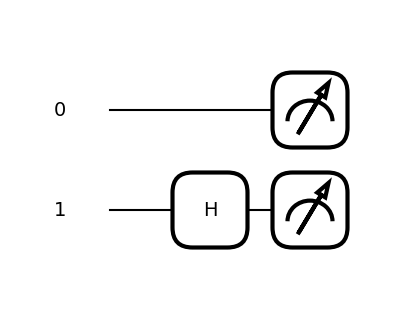

In [58]:
fig, ax = qml.draw_mpl(q2_circuit_1)(obsZX)

### Quantum entaglement

We want to build the so-called Greenberger–Horne–Zeilinger (GHZ) state

$$
\vert GHZ\rangle = \frac{\vert000\rangle+\vert111\rangle}{\sqrt{2}}
$$

This is an **entangled state**. It means that the GHZ state cannot be written as a tensor product of $3$ single qubit states.

To get an entangled state we need to use gates that can entangle qubits. The most typical example is the CNOT gate

$$
CNOT := \begin{pmatrix}
  1 & 0 & 0 & 0 \\
  0 & 1 & 0 & 0 \\
  0 & 0 & 0 & 1 \\
  0 & 0 & 1 & 0
\end{pmatrix}
$$

We see that it is not possible to decompose this gate into a tensor product of two single-qubit gates

> The CNOT gate, together with the single-qubit gates $H$, $S$, and $T$ is an example of a universal set of gates
>
> Every $n$-qubit unitary can always be decomposed into these gates, by using tensor products and linear combinations
>
> Very often, however, it may be necessary to use a number of such gates that grows exponentially in the qubit number $n$.

For completeness, the definition of a $T$ gate is:
$$
T = \sqrt{S} =
\begin{pmatrix}
        1 & 0 \\ 0 & e^{i \frac{\pi}{4}}
\end{pmatrix}
$$

If you are curious, [here](https://en.wikipedia.org/wiki/Clifford_gates) is a brief description of this set of gates, within an active area of research (Clifford circuits)


In [68]:
 # we use an emulator of measurements (emulator of a real experiment): shots

dev2 = qml.device("default.qubit", wires=2, shots=10)

@qml.qnode(dev2, interface="autograd")
def q2_circuit_2():
  qml.Hadamard(wires=0)
  qml.CNOT(wires=[0,1]) # control, target
  #return qml.counts()
  # return qml.counts(qml.PauliZ(0)), qml.counts(qml.PauliZ(1)) # the same as above ( default is in the computational basis Z(0) Z(1) )
  return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1)) # to get the string of results (eigenvalues)

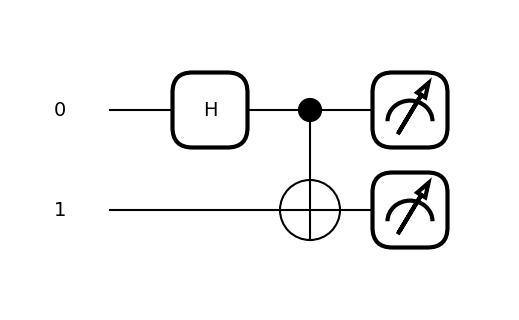

In [69]:
fig, ax = qml.draw_mpl(q2_circuit_2)()

In [82]:
# if you re-run it, the result changes: RANDOMNESS

print(q2_circuit_2())

(tensor([-1, -1, -1,  1, -1, -1, -1,  1, -1, -1], requires_grad=True), tensor([-1, -1, -1,  1, -1, -1, -1,  1, -1, -1], requires_grad=True))


In [108]:
# exact computation via linear algebra (only possible for small systems)
dev2 = qml.device("default.qubit", wires=2)

@qml.qnode(dev2, interface="autograd")
def q2_circuit_3():
  qml.Hadamard(wires=0)
  qml.CNOT(wires=[0,1])
  return qml.state()

print(q2_circuit_3())

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


Finally, here is the quantum circuit for the GHZ state (3 qubits) that generalizes the one above for 2 qubits:

GHZ state vector:
 [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


/tmp/ipykernel_27602/1303430113.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


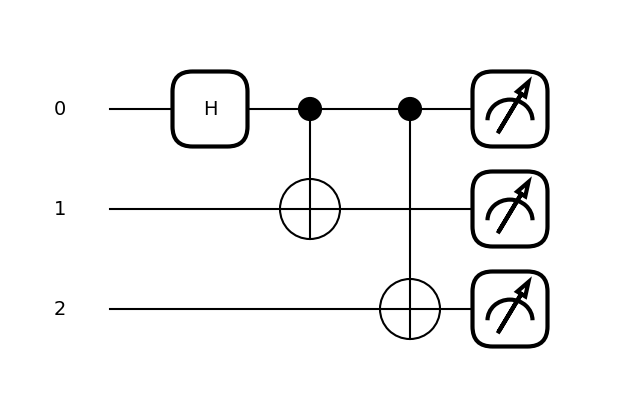

In [109]:
# Define the quantum device
dev3 = qml.device("default.qubit", wires=3)

# Define the QNode to construct the GHZ state
@qml.qnode(dev3)
def ghz_state():
    qml.Hadamard(wires=0)  # Apply Hadamard gate to the first qubit
    qml.CNOT(wires=[0, 1])  # Entangle the first and second qubits
    qml.CNOT(wires=[0, 2])  # Entangle the first and third qubits
    return qml.state()

ghz = ghz_state()
print("GHZ state vector:\n", ghz)

# Draw the circuit
fig, ax = qml.draw_mpl(ghz_state)()

fig.show()


## Exercise 3

One of the most famous algorithms in quantum computing is quantum **teleportation**.

Teleportation is a protocol that transfers the state of a qubit held by one party (Alice) to that of a qubit held by a second party (Bob); the key ingredient is that the parties share a pair of entangled qubits.

It is valid for a generic single-qubit state
$\psi = \alpha |0\rangle + \beta|1\rangle \ \ \text{with}  \ \ |\alpha|^2 +  |\beta|^2 = 1$

<p align="center">
  <img src="teleportation.png" style="height: 300px;width: auto" />
</p>

In the actual quantum teleportation protocol, the measurements are done *before* the last two controlled gates and *classical communication* is required between Alice and Bob:

No superluminal communication is possible

Write the code of a circuit on three qubits implementing the teleportation protocol as indicated in the figure. The last gate is the CZ gate (`qml.CZ`)

In [121]:
##############
# Add device
##############
dev = qml.device("default.qubit", wires=3)

# OPTIONALLY UPDATE THIS STATE PREPARATION ROUTINE
def state_preparation():
  qml.RY(0.1, wires=0)

@qml.qnode(dev)
def teleportation():
    state_preparation()
    qml.Snapshot()
    ##############
    # Add circuit
    ##############
    qml.Hadamard(1)
    qml.CNOT([1,2])
    qml.CNOT([0,1])
    
    qml.Hadamard(0)
    qml.CNOT([1,2])
    qml.CZ([0,1])
    
    return qml.state()

sn = qml.snapshots(teleportation)()['execution_results']
print([ i for i in sn])
[i for i in teleportation()]

[tensor(0.49937513+0.j, requires_grad=True), tensor(0.02498958+0.j, requires_grad=True), tensor(0.49937513+0.j, requires_grad=True), tensor(0.02498958+0.j, requires_grad=True), tensor(0.49937513+0.j, requires_grad=True), tensor(-0.02498958+0.j, requires_grad=True), tensor(-0.49937513+0.j, requires_grad=True), tensor(0.02498958+0.j, requires_grad=True)]


[tensor(0.49937513+0.j, requires_grad=True),
 tensor(0.02498958+0.j, requires_grad=True),
 tensor(0.49937513+0.j, requires_grad=True),
 tensor(0.02498958+0.j, requires_grad=True),
 tensor(0.49937513+0.j, requires_grad=True),
 tensor(-0.02498958+0.j, requires_grad=True),
 tensor(-0.49937513+0.j, requires_grad=True),
 tensor(0.02498958+0.j, requires_grad=True)]

In [122]:
sn

tensor([ 0.49937513+0.j,  0.02498958+0.j,  0.49937513+0.j,
         0.02498958+0.j,  0.49937513+0.j, -0.02498958+0.j,
        -0.49937513+0.j,  0.02498958+0.j], requires_grad=True)

In [65]:
# Check the original single-qubit state and the teleported state on 3 qubit

dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def state_preparation_check():
  qml.RY(0.1, wires=0)
  return qml.state()

print(state_preparation_check())
print(teleportation())

[0.99875026+0.j 0.04997917+0.j]
[0.99875026+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.04997917+0.j 0.        +0.j 0.        +0.j 0.        +0.j]


With this knowledge, write a function that takes a state vector as input, and outputs the state of the third qubit as a two-element vector. Does it match the original state above?

<div class="alert-block alert-info">
	&#128161; <b>Hint:</b> The 3-qubit state is of the type
</div>

$$
\frac{1}{2}\left(\vert00\rangle+\vert01\rangle+\vert10\rangle+\vert11\rangle\right)(\alpha\vert0\rangle+\beta\vert1\rangle)
$$

In [66]:
def extract_qubit_state(input_state):
    """Extract the state of the third qubit from the combined state after teleportation.

    Args:
        input_state (array[complex]): A 3-qubit state of the form
            (1/2)(|00> + |01> + |10> + |11>) (a|0> + b|1>)
            obtained from the teleportation protocol.

    Returns:
        array[complex]: The state vector np.array([a, b]) of the third qubit.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    a = np.sum(input_state[::2])/2 # sum over terms with even index
    b = np.sum(input_state[1::2])/2  # sum over the terms with odd index

    # DETERMINE THE STATE OF THE THIRD QUBIT

    return np.array([a, b])

# Print the extracted state after teleportation
full_state = teleportation()
print(extract_qubit_state(full_state))

[0.52436471+0.j 0.        +0.j]


<div class="alert-block alert-success">
	&#10003; <b>Well done!</b> Lesson number 1 is over.
</div>